In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

In [86]:
# Importing dataset and examining it
dataset = pd.read_csv("customers.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [87]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

In [88]:
# Dropping columns with high correlation + causation 
dataset = dataset.drop(['TotalCharges'], axis = 1)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [89]:
# Converting Categorical features into Numerical features
categorical_features = ['gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
final_data = pd.get_dummies(dataset, columns = categorical_features)
print(final_data.info())
print(final_data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   gender_Female                            7032 non-null   uint8  
 3   gender_Male                              7032 non-null   uint8  
 4   SeniorCitizen_0                          7032 non-null   uint8  
 5   SeniorCitizen_1                          7032 non-null   uint8  
 6   Partner_No                               7032 non-null   uint8  
 7   Partner_Yes                              7032 non-null   uint8  
 8   Dependents_No                            7032 non-null   uint8  
 9   Dependents_Yes                           7032 non-null   uint8  
 10  PhoneService_No                          7032 no

In [90]:
# Dividing data into subsets
#Personal Info
subset1 = final_data[['gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes']]

#Security Choice
subset2 = final_data[['OnlineSecurity_Yes', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No', 
                      'OnlineBackup_No internet service', 'OnlineBackup_Yes','DeviceProtection_No', 'DeviceProtection_Yes', 
                      'DeviceProtection_No internet service', 'TechSupport_No', 'TechSupport_Yes', 'TechSupport_No internet service']]

#Billing
subset3 = final_data[['tenure', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
                     'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
                     'PaymentMethod_Mailed check', 'MonthlyCharges']]

#Offered Services
subset4 = final_data[['PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes', 'MultipleLines_No phone service',
                     'InternetService_DSL', 'InternetService_No', 'InternetService_Fiber optic', 'StreamingTV_No', 'StreamingTV_Yes',
                     'StreamingMovies_No internet service']]

In [91]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)
X2 = feature_scaler.fit_transform(subset2)
X3 = feature_scaler.fit_transform(subset3)
X4 = feature_scaler.fit_transform(subset4)

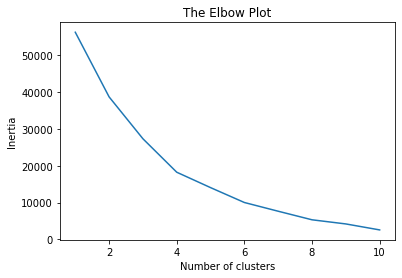

In [92]:
# Analysis on subset1 - Personal Data
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [93]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X1)

KMeans(n_clusters=4)

In [95]:
tsne = TSNE(n_components = 2, perplexity =40,n_iter=4000)
x_tsne = tsne.fit_transform(X1)

gender = list(dataset['gender'])
SeniorCitizen = list(dataset['SeniorCitizen'])
Partner = list(dataset['Partner'])
Dependents = list(dataset['Dependents'])

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'gender: {a}; SeniorCitizen: {b}; Partner:{c}; Dependents:{d}' for a,b,c,d in list(zip(gender,SeniorCitizen,Partner,Dependents))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE1.html')

't-SNE1.html'

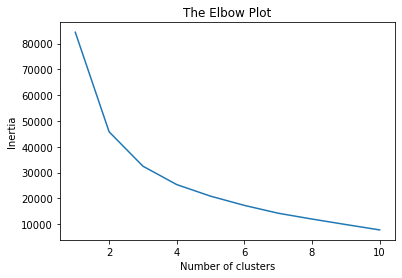

In [109]:
# Analysis on subset2 - Security Choice
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [110]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X2)

KMeans(n_clusters=2)

In [112]:
tsne = TSNE(n_components = 2, perplexity =40,n_iter=4000)
x_tsne = tsne.fit_transform(X2)

OnlineSecurity = list(dataset['OnlineSecurity'])
OnlineBackup = list(dataset['OnlineBackup'])
DeviceProtection = list(dataset['DeviceProtection'])
TechSupport = list(dataset['TechSupport'])

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'OnlineSecurity: {a}; OnlineBackup: {b}; DeviceProtection:{c}; TechSupport:{d}' for a,b,c,d in list(zip(OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 900, height = 900,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE2.html')

't-SNE2.html'

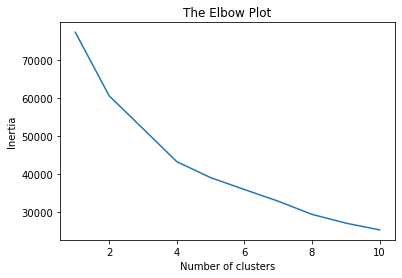

In [101]:
# Analysis on subset3 - Billing Info
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X3)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [102]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X3)

KMeans(n_clusters=4)

In [103]:
tsne = TSNE(n_components = 2, perplexity =40,n_iter=4000)
x_tsne = tsne.fit_transform(X3)

tenure = list(dataset['tenure'])
Contract = list(dataset['Contract'])
PaperlessBilling = list(dataset['PaperlessBilling'])
PaymentMethod = list(dataset['PaymentMethod'])
MonthlyCharges = list(dataset['MonthlyCharges'])

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'tenure: {a}; Contract: {b}; PaperlessBilling:{c}; PaymentMethod:{d}; MonthlyCharges:{e}' for a,b,c,d,e in list(zip(tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE3.html')

't-SNE3.html'

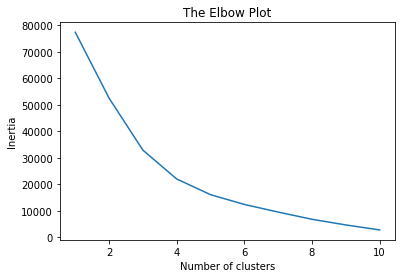

In [106]:
# Analysis on subset4 - Offered Services
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X4)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [107]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X4)

KMeans(n_clusters=4)

In [108]:
tsne = TSNE(n_components = 2, perplexity =40,n_iter=4000)
x_tsne = tsne.fit_transform(X4)

PhoneService = list(dataset['PhoneService'])
MultipleLines = list(dataset['MultipleLines'])
InternetService = list(dataset['InternetService'])
StreamingTV = list(dataset['StreamingTV'])
StreamingMovies = list(dataset['StreamingMovies'])  

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'PhoneService: {a}; MultipleLines: {b}; InternetService:{c}; StreamingTV:{d}; StreamingMovies:{e}' for a,b,c,d,e in list(zip(PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE4.html')

't-SNE4.html'